In [1]:
"""Analyse relationships between items in the average_first_pulse_fit table 
"""

from multipatch_analysis.database import database as db
from multipatch_analysis.first_pulse_fits_average import AverageFirstPulseFits 
import multipatch_analysis.connection_strength as cs 
import pandas as pd
import seaborn as sns

60


In [2]:
#THIS DOES QUERY, EXTRACTS DATA, AND SAVES IN A CSV.
# data_dict={'amp':[], 
#             'NRMSE':[], 
#             'decay_tau':[], 
#             'latency':[], 
#             'rise_time':[], 
#             'pre_cre':[],
#             'post_cre':[],
#             'syn_excitation':[],
#             'distance':[]}

# session=db.Session()
# data=session.query(AverageFirstPulseFits, db.Pair).join(db.Pair).all()
# # extract the relevant data from the query
# for afpf, pair in data:
#     #stuff from average_first_pulse_fit table
#     data_dict['amp'].append(afpf.__dict__['amp'])
#     data_dict['NRMSE'].append(afpf.__dict__['NRMSE'])
#     data_dict['decay_tau'].append(afpf.__dict__['decay_tau'])
#     data_dict['rise_time'].append(afpf.__dict__['rise_time'])
#     data_dict['latency'].append(afpf.__dict__['latency'])

#     #stuff from pair table
#     data_dict['pre_cre'].append(pair.pre_cell.cre_type)
#     data_dict['post_cre'].append(pair.post_cell.cre_type)
#     data_dict['syn_excitation'].append(pair.connection_strength.synapse_type)
#     data_dict['distance'].append(pair.distance)
# session.close()
# df=pd.DataFrame(data_dict)
# df.to_csv('average_fit.csv')

In [3]:
#load data from csv created from query and data extraction above
df=pd.read_csv('average_fit.csv')

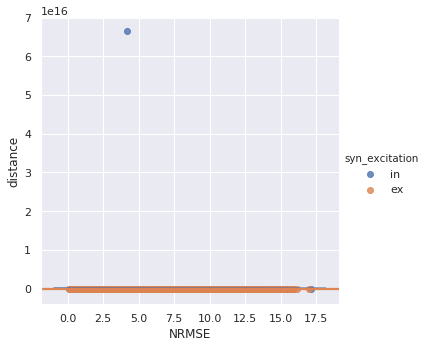

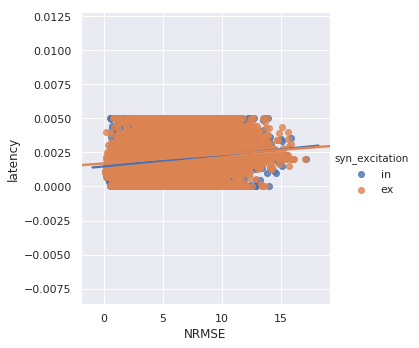

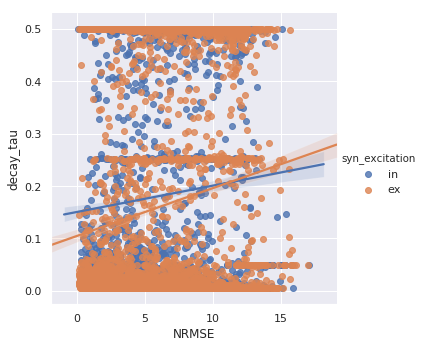

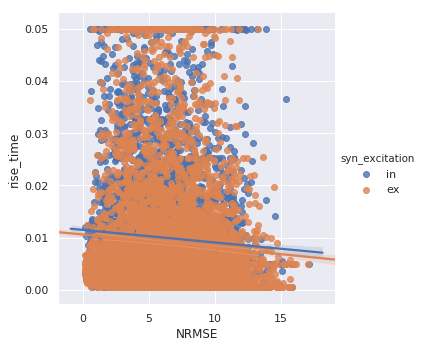

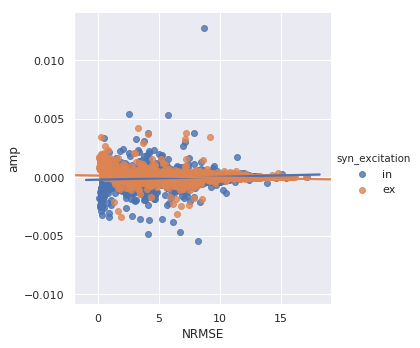

In [4]:
sns.set()
sns.lmplot(x="NRMSE", y="distance", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="latency", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="decay_tau", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="rise_time", hue="syn_excitation", data=df)
sns.lmplot(x="NRMSE", y="amp", hue="syn_excitation", data=df)

